In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# image size 512 x 512
image = plt.imread('4.2.05.tiff')
X = np.reshape(image,(512,1536)).T

In [3]:
# principal component analysis
def pca(X):
    X_mean = X-np.mean(X,axis=1).reshape((1536,1)) # mean = 0
    cov_x = np.cov(X_mean) # covriance matrix
    ev, evecs = np.linalg.eig(cov_x) # eigen vectors and values
    basis = evecs.T
    return ev, evecs, basis

In [4]:
evalues, evectors, basis = pca(X)
Y = np.matmul(basis,X)  # changed basis
Z = np.matmul(basis.T,Y) # returned to original

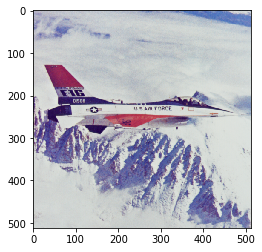

In [5]:
plt.imshow(X.T.reshape((512,512,3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


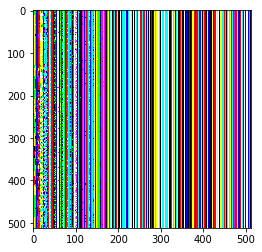

In [6]:
plt.imshow(Y.T.reshape((512,512,3)).real)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


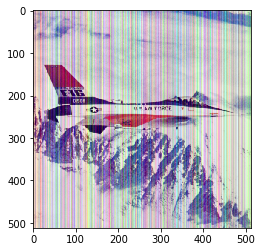

In [7]:
plt.imshow(Z.T.reshape((512,512,3)).real/256)

In [8]:
# dimensionality reduction
def dimension_reduction(basis,ev,k):
    new_basis = np.zeros((k,1536))
    order = np.argsort(ev)
    j = 1535
    for i in range(k):
        new_basis[i,] = basis[order[j],]
        j -= 1
    return new_basis

In [9]:
new_basis = dimension_reduction(basis,evalues,100)

In [10]:
Y_bar = np.matmul(new_basis,X)  # in the new basis
Z_bar = np.matmul(new_basis.T,Y_bar) # getting the original from reduced dimensions

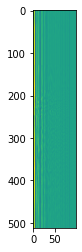

In [11]:
plt.imshow(Y_bar.T)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


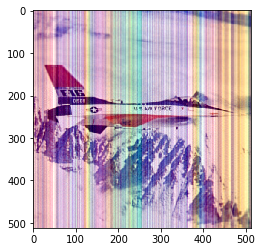

In [12]:
plt.imshow(Z_bar.T.reshape((512,512,3))/256)